# MNIST 50

Nesse notebook irei aplicar um PCA para reduzir a dimensionalidade do MNIST, para 50, e após isso udar outras técnicas de redução. 

O objetivo é poder analizar a precisão da acurácia e também da qualidade da redução. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from scipy.spatial.distance import pdist


from sortedness import sortedness, global_pwsortedness

from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits


from sklearn.preprocessing import StandardScaler

import umap
from sklearn.manifold  import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,Isomap
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.model_selection import train_test_split,  KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix

#Logistic Regression:
from sklearn.linear_model import LogisticRegression
#Support Vector Machines (SVM):
from sklearn.svm import SVC
#Random Forest:
from sklearn.ensemble import RandomForestClassifier
#K-Nearest Neighbors (KNN):
from sklearn.neighbors import KNeighborsClassifier
#Decision Tree:
from sklearn.tree import DecisionTreeClassifier
#Gradient Boosting:
from sklearn.ensemble import GradientBoostingClassifier
#Gaussian Naive Bayes:
from sklearn.naive_bayes import GaussianNB
#AdaBoost:
from sklearn.ensemble import AdaBoostClassifier
#MLP
from sklearn.neural_network import MLPClassifier

## Fazendo as reduções

In [3]:
digits = load_digits()

X = digits['data']
y = digits['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.fit_transform(X_test)

In [4]:
pca = PCA(n_components=50)

pca.fit(Xs_train)
Xs_train_pca50 = pca.transform(Xs_train)

pca.fit(Xs_test)
Xs_test_pca50 = pca.transform(Xs_test)

In [5]:
n_components = 2

In [6]:
start_time = time.time()

pca = PCA(n_components=n_components)

pca.fit(Xs_train_pca50)
Xs_train_pca = pca.transform(Xs_train_pca50)

pca.fit(Xs_test_pca50)
Xs_test_pca = pca.transform(Xs_test_pca50)

end_time = time.time()
execution_time = end_time - start_time
print("Tempo de execução PCA:", execution_time, "segundos")

Tempo de execução PCA: 0.017719745635986328 segundos


In [7]:
start_time = time.time()

mds = MDS(n_components=n_components, random_state=42)

Xs_train_mds = mds.fit_transform(Xs_train_pca50)
Xs_test_mds = mds.fit_transform(Xs_test_pca50)



end_time = time.time()

execution_time = end_time - start_time
print("Tempo de execução MDS:", execution_time, "segundos")

/home/gildex174/.local/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/gildex174/.local/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Tempo de execução MDS: 50.791727781295776 segundos


In [8]:
start_time = time.time()

ica = FastICA(n_components=n_components)
ica.fit(Xs_train_pca50)
Xs_train_ica = ica.transform(Xs_train_pca50)

ica.fit(Xs_test_pca50)
Xs_test_ica = ica.transform(Xs_test_pca50)

end_time = time.time()
execution_time = end_time - start_time
print("Tempo de execução ICA:", execution_time, "segundos")

Tempo de execução ICA: 0.04940009117126465 segundos


/home/gildex174/.local/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/gildex174/.local/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [9]:
start_time = time.time()

isomap = Isomap(n_components=n_components)
Xs_train_isomap = isomap.fit_transform(Xs_train_pca50)

Xs_test_isomap = isomap.fit_transform(Xs_test_pca50)

end_time = time.time()
execution_time = end_time - start_time
print("Tempo de execução Isomap:", execution_time, "segundos")

Tempo de execução Isomap: 0.9602196216583252 segundos


In [10]:
start_time = time.time()

tsne = TSNE(random_state = 42, n_components=n_components,verbose=0, perplexity=40, n_iter=1000)
Xs_train_tsne = tsne.fit_transform(Xs_train_pca50)

Xs_test_tsne = tsne.fit_transform(Xs_test_pca50)


end_time = time.time()
execution_time = end_time - start_time
print("Tempo de execução t-SNE:", execution_time, "segundos")

Tempo de execução t-SNE: 3.6798527240753174 segundos


In [41]:
# LogReg = LogisticRegression(random_state=42, max_iter=1000)
# LogReg.fit(Xs_train_tsne, y_train)

# y_pred = LogReg.predict(Xs_test_tsne)

# acc = accuracy_score(y_pred, y_test)

# print(acc)


In [11]:
start_time = time.time()

umap_model = umap.UMAP(n_components=n_components)

Xs_train_umap = umap_model.fit_transform(Xs_train_pca50)

Xs_test_umap = umap_model.fit_transform(Xs_test_pca50)


end_time = time.time()
execution_time = end_time - start_time
print("Tempo de execução UMAP:", execution_time, "segundos")

Tempo de execução UMAP: 8.388180017471313 segundos


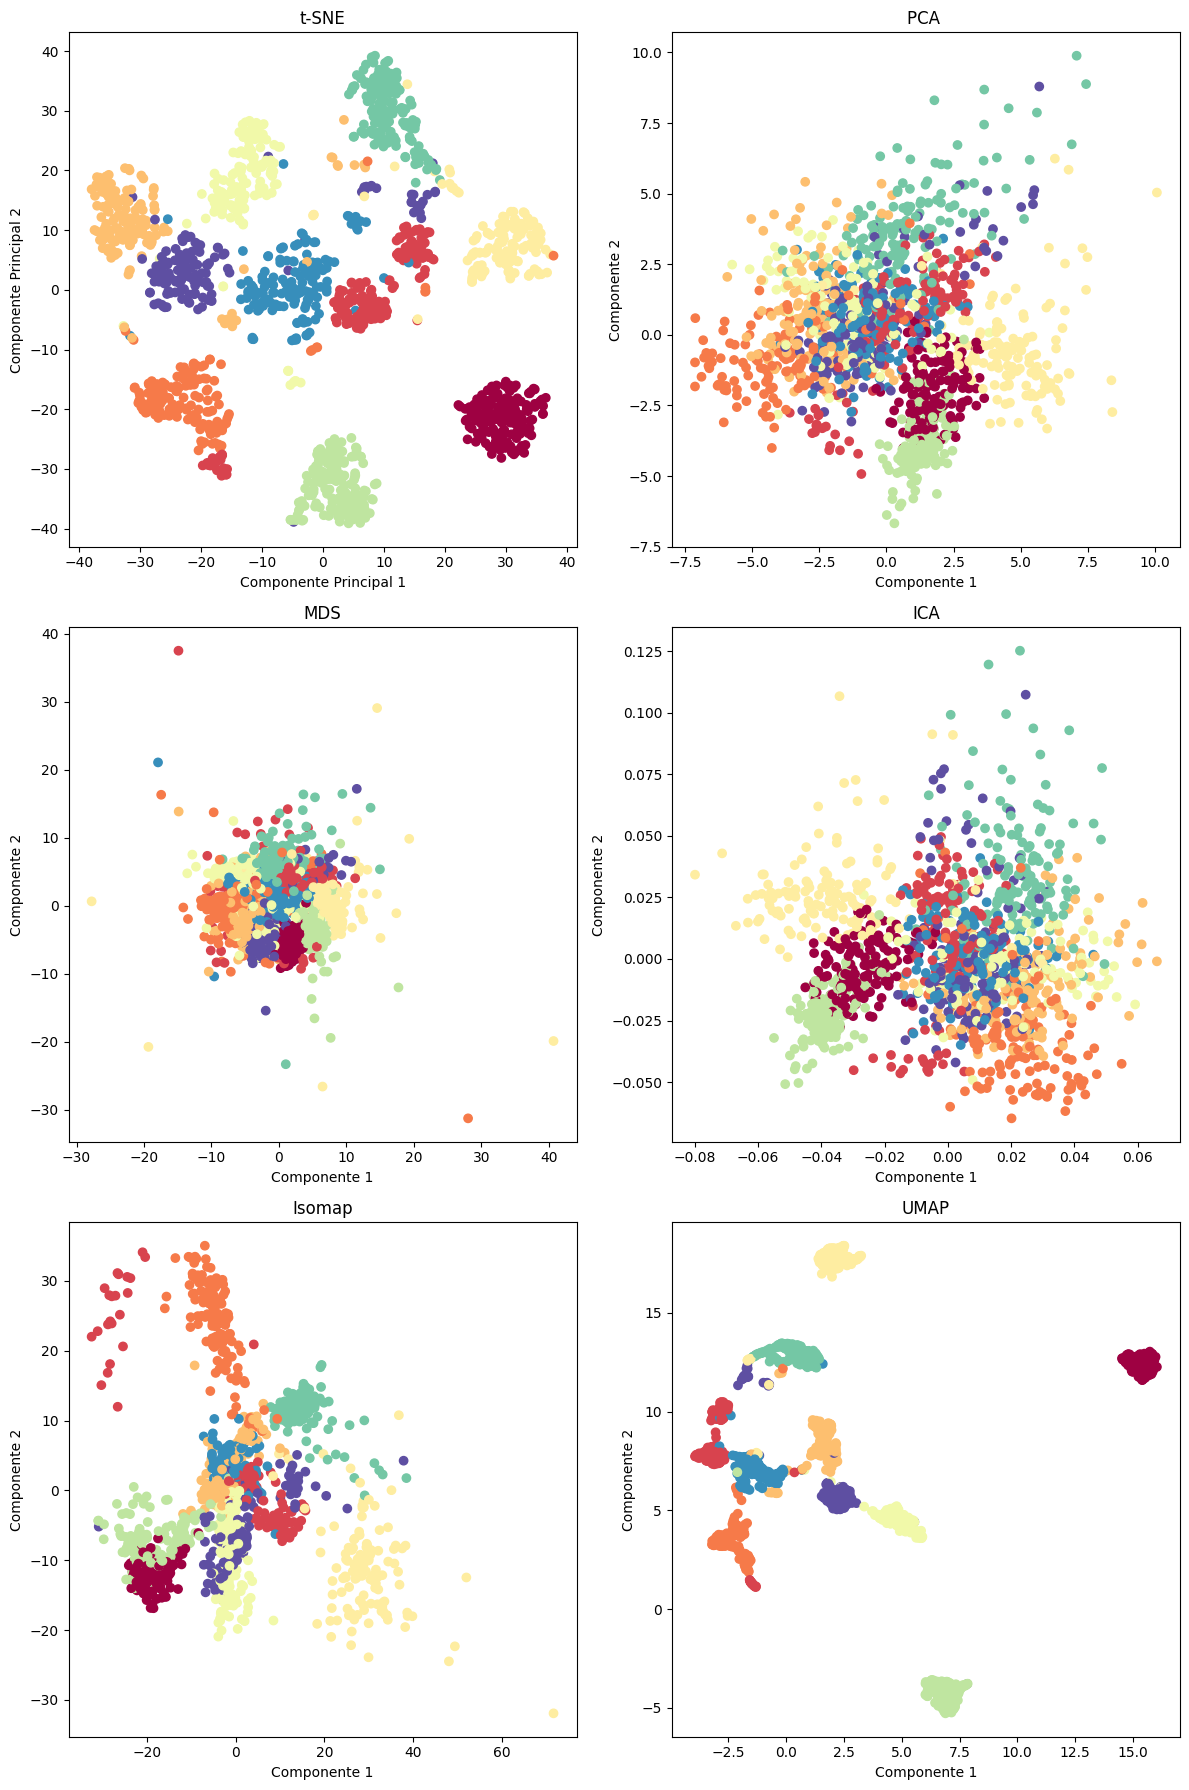

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(12,18))

axes[0][0].scatter(Xs_train_tsne[:, 0], Xs_train_tsne[:, 1], c=np.array(y_train).astype(int), cmap='Spectral')
axes[0][0].set_xlabel('Componente Principal 1')
axes[0][0].set_ylabel('Componente Principal 2')
axes[0][0].set_title('t-SNE')

axes[0][1].scatter(Xs_train_pca[:, 0], Xs_train_pca[:, 1], c=np.array(y_train).astype(int), cmap='Spectral')
axes[0][1].set_xlabel('Componente 1')
axes[0][1].set_ylabel('Componente 2')
axes[0][1].set_title('PCA ')

axes[1][0].scatter(Xs_train_mds[:, 0], Xs_train_mds[:, 1],c=np.array(y_train).astype(int), cmap='Spectral')
axes[1][0].set_xlabel('Componente 1')
axes[1][0].set_ylabel('Componente 2')
axes[1][0].set_title('MDS')

axes[1][1].scatter(Xs_train_ica[:, 0], Xs_train_ica[:, 1], c=np.array(y_train).astype(int), cmap='Spectral')
axes[1][1].set_xlabel('Componente 1')
axes[1][1].set_ylabel('Componente 2')
axes[1][1].set_title('ICA')

axes[2][0].scatter(Xs_train_isomap[:, 0], Xs_train_isomap[:, 1], c=np.array(y_train).astype(int), cmap='Spectral')
axes[2][0].set_xlabel('Componente 1')
axes[2][0].set_ylabel('Componente 2')
axes[2][0].set_title('Isomap')

axes[2][1].scatter(Xs_train_umap[:, 0], Xs_train_umap[:, 1], c=np.array(y_train).astype(int), cmap='Spectral')
axes[2][1].set_xlabel('Componente 1')
axes[2][1].set_ylabel('Componente 2')
axes[2][1].set_title('UMAP')

plt.tight_layout()

plt.show()

## Aplicando os algorimtmos

In [30]:
def usando_algoritmos(X_train, X_test, y_train, y_test, alg_names, algs):
    results = []

    for alg_name in alg_names:
        alg = algs[alg_name]
        alg.fit(X_train, y_train)

        y_pred = alg.predict(X_test)
        acc = accuracy_score(y_pred, y_test)

        print("Algoritmo:", alg_name)
        print("Acurácia:", round(acc, 3))
        print("-------------------------------------")

        results.append((alg_name, acc))  # Armazenar nome do algoritmo e acurácia

    return results

In [15]:
def print_mean(mean_values):
    print('Valores médios:')
    mean_values = np.array(mean_values)
    for mean in mean_values:
        print(mean)

In [16]:
class MyActLearning():

    def __init__(self, n_iterations=5, k_samples=10):
        self.n_iterations = n_iterations
        self.k_samples = k_samples
        self.classifier = LogisticRegression(random_state=42, max_iter=1000)
    
    def fit(self, X_pool, y_pool):
        test_size_aux = X_pool.shape[0] - (0+1)*10
        X_train, X_val, y_train, y_val = train_test_split(X_pool, y_pool, test_size=test_size_aux, random_state=42)

        for i in range(self.n_iterations):
            model = self.classifier.fit(X_train, y_train)
            y_pred = self.classifier.predict(X_val)

            acc = accuracy_score(y_pred, y_val)

            #print(f'Interation {i}: acc = {round(acc,3)*100.}')

            # Obter as probabilidades das classes para o conjunto de teste
            probabilities = model.predict_proba(X_val)

            # Calcular a diferença entre as probabilidades das classes
            differences = np.abs(probabilities[:, 0] - probabilities[:, 1])

            # Ordenar os exemplos pelo valor absoluto da diferença (do menor para o maior)
            sorted_indices = np.argsort(differences)

            # Exibir os 10 exemplos mais incertos
            most_uncertain_indices = sorted_indices[:self.k_samples]

            X_train = np.concatenate((X_train, X_val[most_uncertain_indices]))
            y_train = np.concatenate((y_train, y_val[most_uncertain_indices]))

            X_val = np.delete(X_val, most_uncertain_indices, axis=0)
            y_val = np.delete(y_val, most_uncertain_indices)
    
    def get_params(self, deep=True):
        # Retorna os parâmetros do estimador em um dicionário
        return {"n_iterations": self.n_iterations, "k_samples": self.k_samples}
    
    def predict(self, X):
        y_pred = self.classifier.predict(X)
        return y_pred

In [17]:
algs = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'SVC': SVC(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'MLPClassifier':MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    'MyActLearning':MyActLearning(n_iterations=17)
}

In [18]:
alg_names=['LogisticRegression','SVC','RandomForestClassifier',
            'KNeighborsClassifier','DecisionTreeClassifier','GradientBoostingClassifier',
            'GaussianNB', 'AdaBoostClassifier', 'MLPClassifier','MyActLearning']

In [19]:
X_reduction = [Xs_test, Xs_test_pca, Xs_test_mds, Xs_test_ica, Xs_test_isomap, Xs_test_tsne, Xs_test_umap]
reduction_names = ['Sem Redução', 'PCA', 'MDS', 'ICA', 'Isomap', 't-SNE', 'Umap']


In [31]:
for i in range(len(X_reduction)):
    print(f'######{reduction_names[i]}#######')
    resultados  = usando_algoritmos(Xs_train, Xs_test, y_train, y_test ,alg_names, algs)
    #print_mean(resultados)



######Sem Redução#######
Algoritmo: LogisticRegression
Acurácia: 0.964
-------------------------------------
Algoritmo: SVC
Acurácia: 0.975
-------------------------------------
Algoritmo: RandomForestClassifier
Acurácia: 0.975
-------------------------------------
Algoritmo: KNeighborsClassifier
Acurácia: 0.969
-------------------------------------
Algoritmo: DecisionTreeClassifier
Acurácia: 0.836
-------------------------------------
Algoritmo: GradientBoostingClassifier
Acurácia: 0.964
-------------------------------------
Algoritmo: GaussianNB
Acurácia: 0.111
-------------------------------------
Algoritmo: AdaBoostClassifier
Acurácia: 0.219
-------------------------------------
Algoritmo: MLPClassifier
Acurácia: 0.975
-------------------------------------
Algoritmo: MyActLearning
Acurácia: 0.675
-------------------------------------
######PCA#######
Algoritmo: LogisticRegression
Acurácia: 0.964
-------------------------------------
Algoritmo: SVC
Acurácia: 0.975
------------------

In [27]:
for i in range(len(X_reduction)):
    score = sortedness(Xs_test, X_reduction[i])
    score2 = global_pwsortedness(Xs_test, X_reduction[i])

    print(f"Sortedness {reduction_names[i]}:", round(score[0],3))
    print(f"Global Sortedness {reduction_names[i]}:", round(score2[0],3))
    print('----------------------------------------------------')

Sortedness Sem Redução: 1.0
Global Sortedness Sem Redução: 1.0
----------------------------------------------------
Sortedness PCA: 0.766
Global Sortedness PCA: 0.452
----------------------------------------------------
Sortedness MDS: 0.785
Global Sortedness MDS: 0.608
----------------------------------------------------
Sortedness ICA: 0.761
Global Sortedness ICA: 0.45
----------------------------------------------------
Sortedness Isomap: 0.674
Global Sortedness Isomap: 0.27
----------------------------------------------------
Sortedness t-SNE: 0.726
Global Sortedness t-SNE: 0.336
----------------------------------------------------
Sortedness Umap: 0.581
Global Sortedness Umap: 0.199
----------------------------------------------------
